<a href="https://colab.research.google.com/github/QingLi117/NLP/blob/main/Binary%20Classification%20with%20a%20Tabular%20Employee%20Attrition%20ML%20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SET UP**

In [162]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow import keras
import kerastuner as kt
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# **Data Preparation**

In [3]:
train_data = pd.read_csv('/content/train.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
train_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [6]:
for col in [2,4,7,10,14,16,20,21]:
  print(train_data.iloc[:,col].unique())

['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
['Research & Development' 'Sales' 'Human Resources']
['Medical' 'Other' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources']
['Male' 'Female']
['Laboratory Technician' 'Sales Representative' 'Sales Executive'
 'Healthcare Representative' 'Manager' 'Manufacturing Director'
 'Research Scientist' 'Human Resources' 'Research Director']
['Married' 'Divorced' 'Single']
['Y']
['Yes' 'No']


In [7]:
train_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


In [8]:
train_data.isnull()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1673,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1674,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
train_data_features = train_data.copy()

In [10]:
list_to_pop = ['id','EmployeeCount','Over18','StandardHours','Attrition']
for col in list_to_pop:
  train_data_labels = train_data_features.pop(col)
train_data_labels

0       0
1       0
2       0
3       0
4       1
       ..
1672    0
1673    0
1674    1
1675    0
1676    0
Name: Attrition, Length: 1677, dtype: int64

In [11]:
train_data_features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Yes,13,3,2,1,10,2,3,10,0,7,8
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,No,17,3,4,1,4,3,3,4,2,0,3
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,No,17,3,4,2,4,3,3,3,2,1,2
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,No,14,3,3,0,15,1,1,6,0,0,2
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Yes,13,3,3,0,31,0,3,31,14,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,4,Female,73,3,3,Sales Executive,3,Single,8722,14255,1,No,19,3,2,0,10,2,4,10,0,0,8
1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,Male,48,3,1,Research Scientist,2,Married,3544,15972,4,No,19,3,4,1,10,3,4,4,2,1,3
1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,2,Male,36,2,1,Human Resources,1,Married,2804,15322,1,Yes,11,3,3,0,1,2,3,1,0,0,0
1675,36,Travel_Rarely,441,Sales,9,2,Marketing,2,Male,48,4,2,Sales Executive,3,Divorced,5406,4051,1,No,21,4,3,2,10,3,2,10,3,0,8


*match the names and data-type of the csv columns*

In [12]:
inputs = {}
for name,column in train_data_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32
  inputs[name] = tf.keras.Input(shape=(1,),name = name, dtype = dtype)
inputs

{'Age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Age')>,
 'BusinessTravel': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'BusinessTravel')>,
 'DailyRate': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'DailyRate')>,
 'Department': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Department')>,
 'DistanceFromHome': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'DistanceFromHome')>,
 'Education': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Education')>,
 'EducationField': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'EducationField')>,
 'EnvironmentSatisfaction': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'EnvironmentSatisfaction')>,
 'Gender': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Gender')>,
 'HourlyRate': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'HourlyRate')>,
 'JobInvolvement': <KerasTensor: shape=(None, 

*concatenate the numeric inputs together*
*and run them through a normalization layers* 

In [13]:
numeric_inputs = {name:input 
                  for name,input in inputs.items()
                  if input.dtype == tf.float32}
x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(train_data[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
all_numeric_inputs 

<KerasTensor: shape=(None, 23) dtype=float32 (created by layer 'normalization')>


*Collect all the symbolic preprocessing results, to concatenate them later*

In [14]:
preprocessed_inputs = [all_numeric_inputs]

*Handling categorical features*

In [15]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue 
  
  lookup = layers.StringLookup(vocabulary = np.unique(train_data_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens = lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

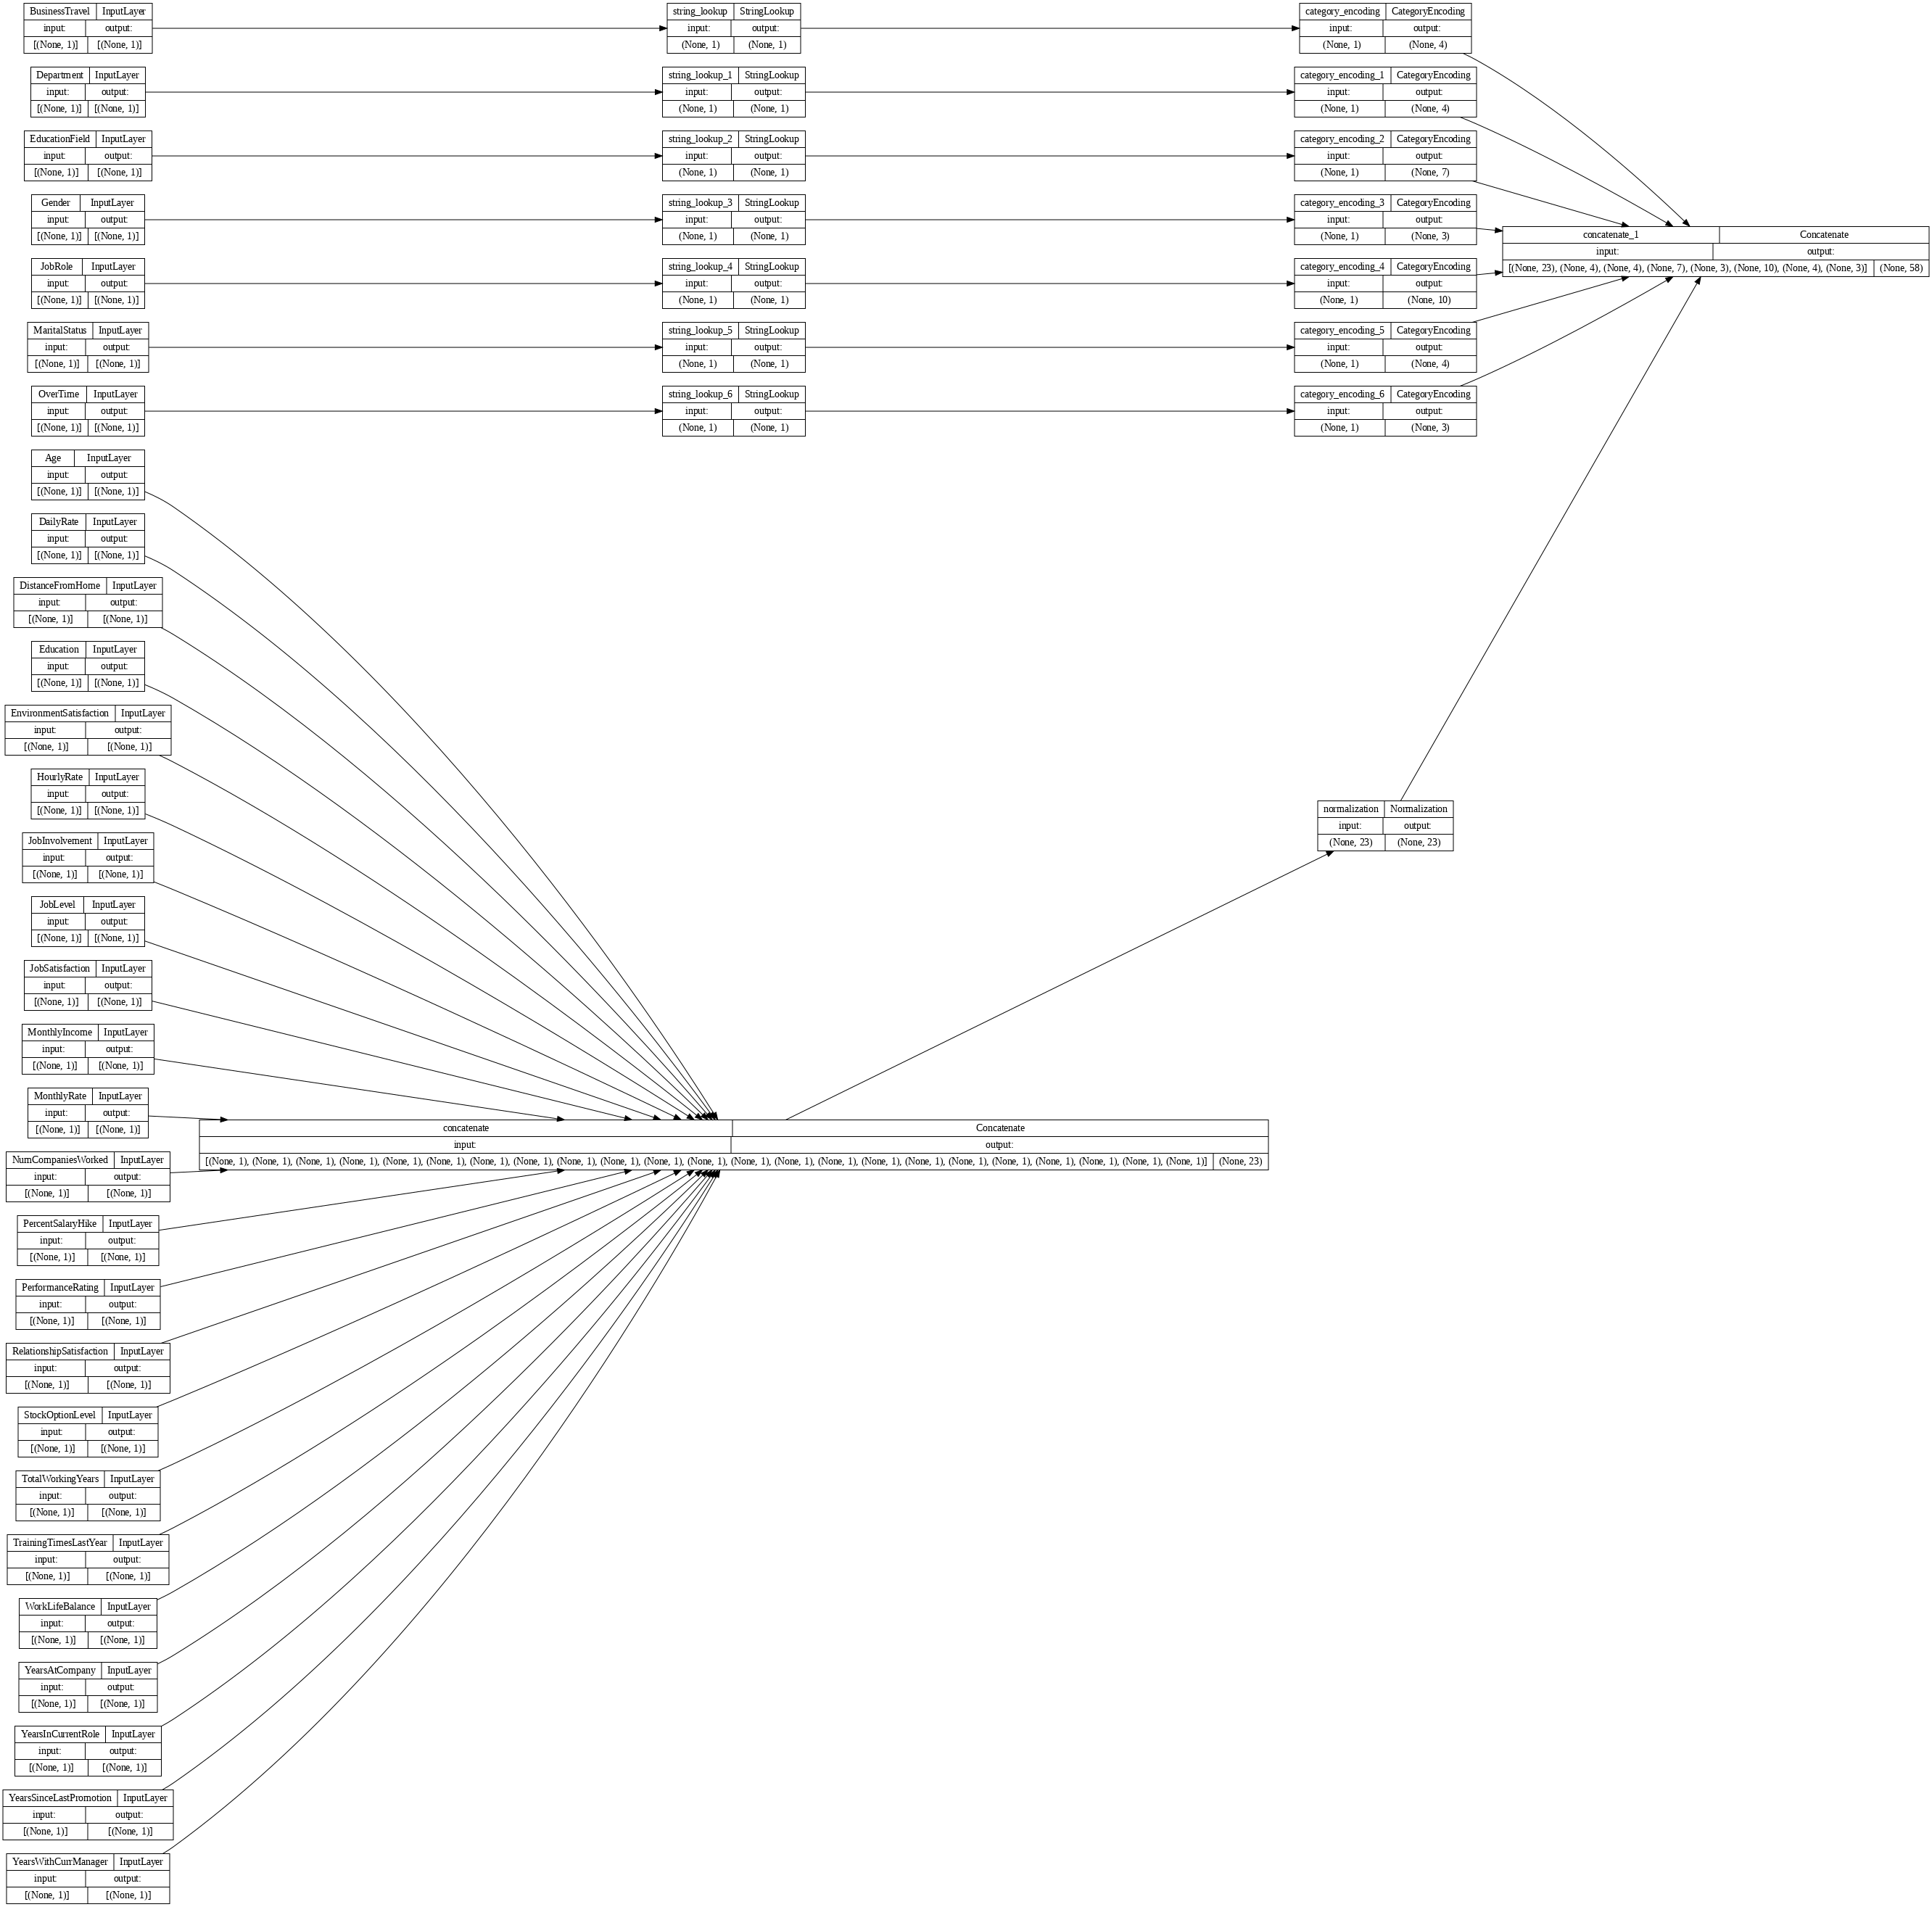

In [16]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)
employee_preprocessing = tf.keras.Model(inputs,preprocessed_inputs_cat)
tf.keras.utils.plot_model(model = employee_preprocessing, rankdir = "LR",dpi =72,show_shapes = True)

In [17]:
train_data_features_dict = {name:np.array(value) for name,value in train_data_features.items()}

# the dataset into train0.7,validation0.2 and test 0.1




In [18]:
traindatafeatures_dict = {name:values[:1205] for name,values in train_data_features_dict.items()}
validationfeatures_dict = {name:values[1205:1508] for name,values in train_data_features_dict.items()}
testfeatures_dict = {name:values[1508:] for name,values in train_data_features_dict.items()}

In [19]:
traindata_labels = train_data_labels.iloc[:1205]
validation_labels = train_data_labels.iloc[1205:1508]
test_labels = train_data_labels.iloc[1508:]


# **Build the initial DL model with 1 hidden layer**



In [40]:
def employee_model (preprocessing_head, inputs):
  body = tf.keras.Sequential([
      layers.Dense(100,activation='relu'),
      layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs,result)

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits =True),
                metrics = ['accuracy'])
  return model

employee_model = employee_model(employee_preprocessing,inputs)

*Fit the model*

In [42]:
employee_model.fit(x=traindatafeatures_dict, y=traindata_labels,epochs=10)

Epoch 1/10
38/38 [==============================] - 1s 3ms/step - loss: 0.3211 - accuracy: 0.8822
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.8896
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2376 - accuracy: 0.8996
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.8979
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2248 - accuracy: 0.9004
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2200 - accuracy: 0.9029
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.9037
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2102 - accuracy: 0.9046
Epoch 9/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2055 - accuracy: 0.9079
Epoch 10/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2010 - accuracy: 0.9071


*Performance on validation dataset* 

In [43]:
test_loss,test_accuracy = employee_model.evaluate(validationfeatures_dict,validation_labels)

10/10 [==============================] - 1s 4ms/step - loss: 0.3045 - accuracy: 0.8779


overfitting

# **Tune hyperparameters**

*check the class distribution of the training dataset*

In [28]:
class_counts = tf.math.bincount(traindata_labels)
print(class_counts)

tf.Tensor([1061  144], shape=(2,), dtype=int32)


*compute the class weights*

class_weight0 = 1205/(1061*2) = 0.284.     
class_weight1= 1205/(144*2) = 4.18

In [29]:
class_weight = {0:0.284,1:4.18}

In [148]:
def employee_model2 (preprocessing_head, inputs):
  body = tf.keras.Sequential([
      layers.Dense(100,activation='relu',kernel_regularizer = regularizers.l2(0.01)),
      layers.Dropout(rate=0.1),
      layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs,result)

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits =True),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
                )
  return model

employee_model2 = employee_model2(employee_preprocessing,inputs)

In [151]:
employee_model2.fit(x=traindatafeatures_dict, y=traindata_labels,epochs=10,class_weight = class_weight)

Epoch 1/10
38/38 [==============================] - 2s 7ms/step - loss: 0.5070 - accuracy: 0.7959
Epoch 2/10
38/38 [==============================] - 0s 9ms/step - loss: 0.4122 - accuracy: 0.7286
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.3956 - accuracy: 0.7361
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3864 - accuracy: 0.7402
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3768 - accuracy: 0.7419
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.3706 - accuracy: 0.7585
Epoch 7/10
38/38 [==============================] - 1s 14ms/step - loss: 0.3582 - accuracy: 0.7627
Epoch 8/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3541 - accuracy: 0.7726
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.3518 - accuracy: 0.7602
Epoch 10/10
38/38 [==============================] - 0s 5ms/step - loss: 0.3509 - accuracy: 0.7685


In [152]:
test_loss,test_accuracy = employee_model2.evaluate(validationfeatures_dict,validation_labels)

10/10 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.7591


**Use initial DL model with 1 hidden laye**

In [154]:
y_pred = employee_model.predict(testfeatures_dict)

6/6 [==============================] - 0s 3ms/step


In [157]:
y_pred_binary = np.round(y_pred)

In [163]:
accuracy = employee_model.evaluate(testfeatures_dict,test_labels)[1]
precision,recall,f1_score,_= classification_report(test_labels,y_pred_binary).split()[-4:]
auc_score = roc_auc_score(test_labels,y_pred)

print("Accuracy:",accuracy)
print("Precsion:",precision)
print("recall:",recall)
print("AUC Score:",auc_score)

6/6 [==============================] - 0s 7ms/step - loss: 0.7217 - accuracy: 0.8521
Accuracy: 0.8520709872245789
Precsion: 0.82
recall: 0.79
AUC Score: 0.33986928104575165


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
